In [19]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("D:\GitHub\QishiQR")
import Utils.MajorContract_Offsets
import importlib
importlib.reload(Utils.MajorContract_Offsets)
from Utils.MajorContract_Offsets import *

import Backtesting.Vectorized.lm_validation
importlib.reload(Backtesting.Vectorized.lm_validation)
from Backtesting.Vectorized.lm_validation import LmValidation

importlib.reload(Backtesting.Vectorized.Strategy)
from Backtesting.Vectorized.Strategy import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
freq=5
px_th = 0
offset = [0.1+i for i in range(5)]

bu_train, bu_test, bu_probability_table = MajorContracts(symbol='bu', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'], 
                                                    '1609':['2016-2-1','2016-8-1'], 
                                                    '1612':['2016-6-1','2016-11-15'],
                                                    '1706':['2016-10-15','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1609':'2016-7-1', 
                                                    '1612':'2016-11-1', 
                                                    '1706':'2017-1-1' },
                                        price='MidPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

bu1606 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104.0 20160331.0
probability table:  20160104.0 20160331.0
probability table:  20160104.0 20160331.0
probability table:  20160104.0 20160331.0
probability table:  20160104.0 20160331.0
bu1609 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-04-01 00:00:00 2016-07-01 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
bu1612 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID tra

In [22]:
for offset in bu_test.keys():
    bu_test[offset].to_csv(r'../Output/bu_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1609', '1612']:
    bu_probability_table[contract].to_csv(r'../Strategy/bu_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [23]:
#bu
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/bu_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

bu_1606_major_strategy_5_th0.csv
bu_1609_major_strategy_5_th0.csv
bu_1612_major_strategy_5_th0.csv
   prior      0      1      2  total signal
0      p  10841  14627  15448  40916      2
1     p0   3426   3610   3804  10840      2
2    p00   1193   1073   1159   3425      0
3   p000    460    342    390   1192      0
4  p0000    202    127    130    459      0


bu_major_5_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


bu_major_5_th0_1.1.csv
bu_major_5_th0_2.1.csv
bu_major_5_th0_3.1.csv
bu_major_5_th0_4.1.csv


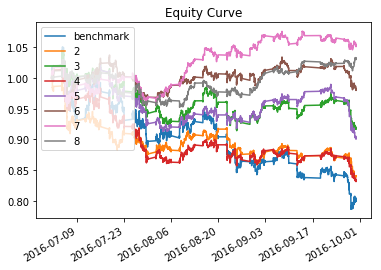

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.264040             -0.002704                -0.002645   
1               0.239042             -0.001293                -0.003345   
2               0.250000             -0.002839                -0.003428   
3               0.252305             -0.001575                -0.003351   
4               0.243901             -0.000249                -0.002851   
5               0.256734              0.000851                -0.002672   
6               0.261489              0.000541                -0.002619   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001718                 -0.000078             -0.032686   
1                 0.002005                 -0.000065             -0.030950   
2                 0.001813                 -0.000126             -0.029896   
3                 0.001960                 -0.000075             -0.030700   
4        

In [31]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='bu_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

bu_major_5_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


bu_major_5_th0_1.1.csv
bu_major_5_th0_2.1.csv
bu_major_5_th0_3.1.csv
bu_major_5_th0_4.1.csv


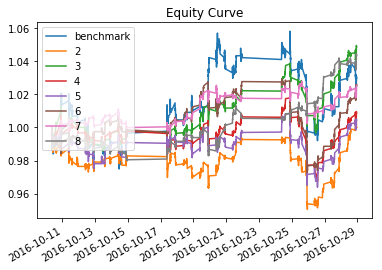

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.270892              0.000058                -0.002564   
1               0.223919              0.003227                -0.003369   
2               0.228408              0.000640                -0.003248   
3               0.263741              0.000341                -0.003502   
4               0.289985              0.001733                -0.002950   
5               0.245951              0.001704                -0.002646   
6               0.260622              0.002877                -0.002629   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001779                  0.000002             -0.017177   
1                 0.002159                  0.000159             -0.019874   
2                 0.001912                  0.000028             -0.021755   
3                 0.002040                  0.000017             -0.024367   
4        

In [26]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-10-31', symbol='bu_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

bu_major_5_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


bu_major_5_th0_1.1.csv
bu_major_5_th0_2.1.csv
bu_major_5_th0_3.1.csv
bu_major_5_th0_4.1.csv


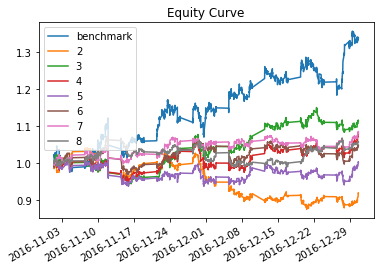

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.368611             -0.001786                -0.003786   
1               0.364136              0.002619                -0.004640   
2               0.378714              0.001897                -0.004475   
3               0.381940              0.000203                -0.004750   
4               0.413123              0.001190                -0.004184   
5               0.379364              0.001958                -0.003833   
6               0.393782              0.001355                -0.003699   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002218                 -0.000051             -0.037695   
1                 0.002883                  0.000130             -0.034278   
2                 0.002470                  0.000073             -0.034459   
3                 0.002615                  0.000005             -0.033651   
4        

In [27]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-11-1',end='2016-12-31', symbol='bu_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()

# price threshold = 1

In [36]:
freq=5
px_th = 2
offset = [0.1+i for i in range(5)]

bu_train, bu_test, bu_probability_table = MajorContracts(symbol='bu', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'], 
                                                    '1609':['2016-2-1','2016-8-1'], 
                                                    '1612':['2016-6-1','2016-11-15'],
                                                    '1706':['2016-10-15','2017-1-31']}, 
                                       transitions={'1606':'2016-4-1', 
                                                    '1609':'2016-7-1', 
                                                    '1612':'2016-11-1', 
                                                    '1706':'2017-1-1' },
                                        price='MidPrice',
                                        freq = freq, offset = offset, threshold=px_th).create_major_overlap()

bu1606 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104.0 20160331.0
probability table:  20160104.0 20160331.0
probability table:  20160104.0 20160331.0
probability table:  20160104.0 20160331.0
probability table:  20160104.0 20160331.0
bu1609 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-04-01 00:00:00 2016-07-01 00:00:00
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
probability table:  20160401.0 20160630.0
bu1612 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID tra

In [37]:
for offset in bu_test.keys():
    bu_test[offset].to_csv(r'../Output/bu_major_' + str(freq) + '_th' + str(px_th) + '_' + offset + '.csv')
for contract in ['1606', '1609', '1612']:
    bu_probability_table[contract].to_csv(r'../Strategy/bu_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(px_th) + '.csv', index=False)

In [38]:
#bu
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_major_strategy_"+str(freq)+"_th"+str(px_th)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/bu_major_strategy_'+str(freq)+'_th'+str(px_th)+'.csv')
print(slm.head())

bu_1606_major_strategy_5_th2.csv
bu_1609_major_strategy_5_th2.csv
bu_1612_major_strategy_5_th2.csv
   prior      0     1     2  total signal
0      p  26186  7186  7544  40916      0
1     p0  17941  4046  4189  26176      0
2    p00  12803  2535  2595  17933      0
3   p000   9387  1678  1731  12796      0
4  p0000   7011  1190  1181   9382      0


bu_major_5_th2_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


bu_major_5_th2_1.1.csv
bu_major_5_th2_2.1.csv
bu_major_5_th2_3.1.csv
bu_major_5_th2_4.1.csv


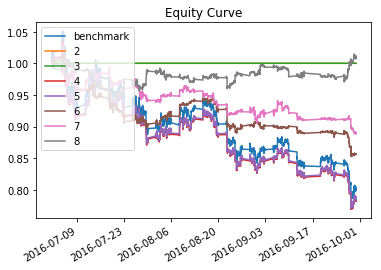

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.000000              0.000000                      NaN   
2               0.252392             -0.003781                -0.238185   
3               0.249348             -0.003750                -0.236227   
4               0.244773             -0.002410                -0.022422   
5               0.246259             -0.001818                -0.011834   
6               0.269021              0.000198                -0.007939   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                      NaN                 -0.119093             -0.238185   
3                      NaN                 -0.118114             -0.236227   
4        

In [39]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-9-30', symbol='bu_major_'+str(freq)+'_'+'th'+str(px_th), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, price='MidPrice', px_th=px_th)
lm_validation.run()